In [1]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_feather('anti-tom-no-masking.feather')
df.head()

,x,y,0,1,2,3,4,5,6,7,...,761,762,763,764,765,766,767,title,word,title_color
0,-53.226841,-0.705614,-0.016290,-4.579349,-4.142798,-4.135424,-3.207198,1.268065,1.603544,5.255670,...,2.072432,1.286653,4.199144,-0.260763,-1.543000,0.816705,-0.013712,randolph.txt,the,"[0.932953826691967, 1.0, 0.03478810879190386, ..."
1,-39.123138,-19.053034,-13.982450,2.749680,-4.193947,-2.990233,0.257156,2.482200,6.614248,-1.626773,...,2.169677,8.157495,7.053337,5.976264,-1.611567,0.497688,3.584454,randolph.txt,of,"[0.932953826691967, 1.0, 0.03478810879190386, ..."
2,-32.899914,-14.628258,-3.961664,7.479816,-1.893057,6.303956,-1.047222,2.691298,3.052382,6.308680,...,-1.122658,2.554317,2.885663,8.062206,-0.348552,3.743321,10.223579,randolph.txt,a,"[0.932953826691967, 1.0, 0.03478810879190386, ..."
3,12.729522,-1.262507,8.087168,12.465355,11.763407,0.987228,-6.620713,2.325431,-14.085854,5.672825,...,7.861260,6.884431,4.732465,4.679752,-4.155134,6.505958,1.452106,randolph.txt,like,"[0.932953826691967, 1.0, 0.03478810879190386, ..."
4,-38.779980,-19.023769,-9.712944,-8.281013,-2.615444,-1.290691,-2.783760,3.428218,4.295157,7.440933,...,2.679304,2.834969,2.836375,8.820018,3.736745,8.626409,-7.932276,randolph.txt,the,"[0.932953826691967, 1.0, 0.03478810879190386, ..."


In [3]:
df.shape

(1652083, 773)

In [4]:
def calculate_centroid(points):
    num_points = len(points)
    sum_x = sum(point[0] for point in points)
    sum_y = sum(point[1] for point in points)
    centroid_x = sum_x / num_points
    centroid_y = sum_y / num_points
    return (centroid_x, centroid_y)

In [5]:
centroid_coordinates={}
for k in df['title'].unique():
    centroid_coordinates[k]=calculate_centroid(np.array(df[df['title'] == k][['x', 'y']]))

In [6]:
centroid_df=pd.DataFrame.from_dict(centroid_coordinates).T
centroid_df.reset_index(inplace=True)
centroid_df.columns=['title','x','y']

In [7]:
centroid_df['title'].unique()

array(['randolph.txt', 'mcintosh.txt', 'vidi.txt', 'wiley.txt',
       'burwell.txt', 'butt.txt', 'estes.txt', 'hall.txt', 'eastman.txt',
       'chase.txt', 'smith.txt', 'schoolcraft.txt', 'criswell.txt',
       'cowdin.txt', 'page.txt', 'flanders.txt', 'hentz.txt', 'rush.txt',
       'dill.txt', 'simms.txt', 'hale.txt', 'uncle-tom.txt'], dtype=object)

In [15]:
centroid_df_non_uncle_tom=centroid_df[centroid_df['title']!='uncle-tom.txt']
centroid_df_uncle_tom=centroid_df[centroid_df['title']=='uncle-tom.txt']

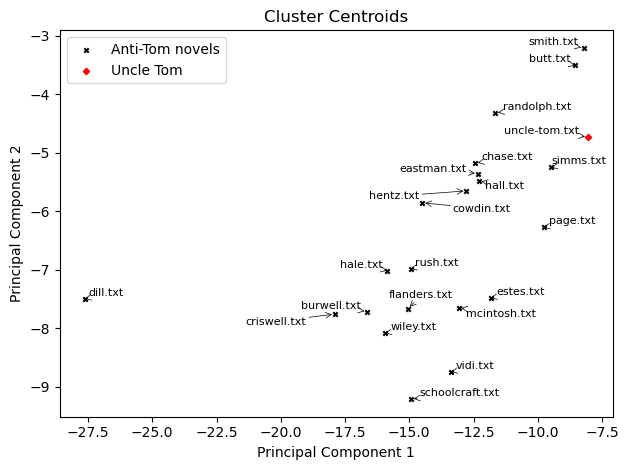

In [16]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.scatter(
    centroid_df_non_uncle_tom['x'], centroid_df_non_uncle_tom['y'],
    marker='x', c='black', s=10, alpha=1, label='Anti-Tom novels'
)
plt.scatter(
    centroid_df_uncle_tom['x'], centroid_df_uncle_tom['y'],
    marker='D', c='red', s=10, alpha=1, label='Uncle Tom'
)

annotations = [
    plt.annotate(title, (x, y), fontsize=8)
    for x, y, title in zip(centroid_df['x'], centroid_df['y'], centroid_df['title'])
]
adjust_text(
    annotations, 
    arrowprops=dict(arrowstyle="->", color='black', lw=0.5),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_text=(0.5, 0.5),
    lim=1000,
    only_move={'points':'xy', 'text':'xy'}
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Centroids')
plt.legend()
plt.tight_layout()  
plt.savefig('figure/anti-tom-centroids.png', dpi=300, bbox_inches='tight')
plt.show()

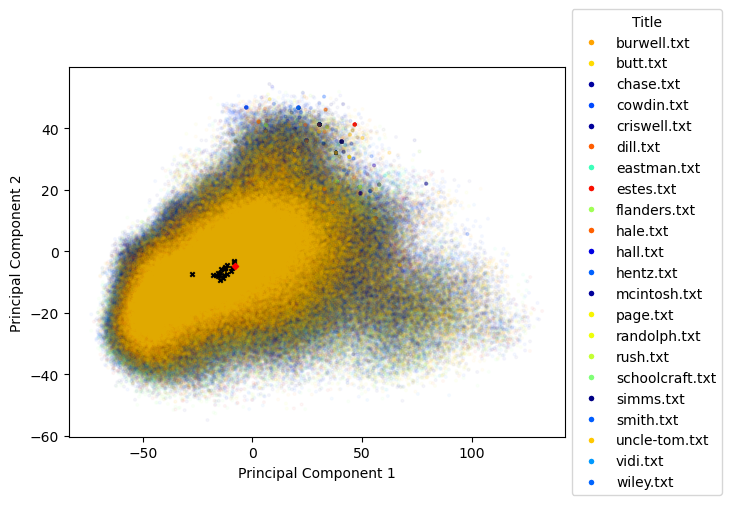

In [12]:
import matplotlib.pyplot as plt
import random

# Assuming you have the necessary data and variables defined

# Get unique titles
unique_titles = df['title'].unique()

# Generate 21 distinct random colors
num_colors = len(unique_titles)
random.seed(42)  # for reproducibility
colors = [plt.cm.jet(random.random()) for _ in range(num_colors)]

# Map titles to corresponding colors
title_to_color = {title: color for title, color in zip(unique_titles, colors)}
df['title_color'] = df['title'].map(title_to_color)

# Create a scatter plot using Matplotlib with distinct random colors and adjusted alpha
plt.scatter(df['x'], df['y'], c=df['title_color'], s=4, alpha=0.03)
plt.scatter(centroid_df[centroid_df['title'] != 'uncle-tom.txt']['x'], centroid_df[centroid_df['title'] != 'uncle-tom.txt']['y'], marker='x', c='black', s=10, alpha=1)
plt.scatter(centroid_df[centroid_df['title'] == 'uncle-tom.txt']['x'], centroid_df[centroid_df['title'] == 'uncle-tom.txt']['y'], marker='D', c='red', s=10, alpha=1)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create legend handles sorted alphabetically by title
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=5, label=title)
                  for title, color in sorted(title_to_color.items(), key=lambda item: item[0])]  # Sort by title

# Add a legend to the right
plt.legend(handles=legend_handles, title='Title', loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.savefig('figure/anti-tom-BERT.png', bbox_inches='tight', dpi=300)
plt.show()
